In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,VotingClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#from matplotlib import rcParams
#rcParams['figure.figsize']=(20,10)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
customer_data=pd.read_excel('/content/drive/My Drive/CAPSTONE PROJECT 2/CUSTOMER_DETAILS.xlsx')

In [4]:
customer_data.head()

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000001,F,0-17,10
2,1000001,F,0-17,10
3,1000001,F,0-17,10
4,1000002,M,55+,16


In [0]:
location_data=pd.read_excel('/content/drive/My Drive/CAPSTONE PROJECT 2/LOCATIONS_DETAILS.xlsx')

In [6]:
location_data.head()

,User_ID,City_Category,Stay_In_Current_City_Years
0,1000001,A,2
1,1000001,A,2
2,1000001,A,2
3,1000001,A,2
4,1000002,C,4+


In [0]:
product_data=pd.read_csv('/content/drive/My Drive/CAPSTONE PROJECT 2/PRODUCT_DETAILS.csv')

In [8]:
product_data.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,3,NaN,NaN,8370
1,1000001,P00248942,1,6.0,14.0,15200
2,1000001,P00087842,12,NaN,NaN,1422
3,1000001,P00085442,12,14.0,NaN,1057
4,1000002,P00285442,8,NaN,NaN,7969


In [0]:
data=pd.merge(customer_data,location_data,on='User_ID',right_index=True,left_index=True)

In [10]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,F,0-17,10,A,2
1,1000001,F,0-17,10,A,2
2,1000001,F,0-17,10,A,2
3,1000001,F,0-17,10,A,2
4,1000002,M,55+,16,C,4+


In [11]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 6 columns):
User_ID               537577 non-null int64
Product_ID            537577 non-null object
Product_Category_1    537577 non-null int64
Product_Category_2    370591 non-null float64
Product_Category_3    164278 non-null float64
Purchase              537577 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.6+ MB


In [0]:
product_data.User_ID=product_data.User_ID.astype('int32')
product_data.Product_Category_1=product_data.Product_Category_1.astype('int32')
product_data.Purchase=product_data.Purchase.astype('int32')
product_data.Product_Category_2=product_data.Product_Category_2.astype('float32')
product_data.Product_Category_3=product_data.Product_Category_3.astype('float32')

In [0]:
data=pd.merge(data,product_data,on='User_ID',right_index=True,left_index=True)

In [0]:
data_for_tableau=data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Product_ID                    537577 non-null object
Product_Category_1            537577 non-null int32
Product_Category_2            370591 non-null float32
Product_Category_3            164278 non-null float32
Purchase                      537577 non-null int32
dtypes: float32(2), int32(2), int64(2), object(5)
memory usage: 36.9+ MB


# Univarient Analysis

In [16]:
data.User_ID.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [17]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [18]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
data.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [20]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
data.Stay_In_Current_City_Years.unique()

array([2, '4+', 3, 1, 0], dtype=object)

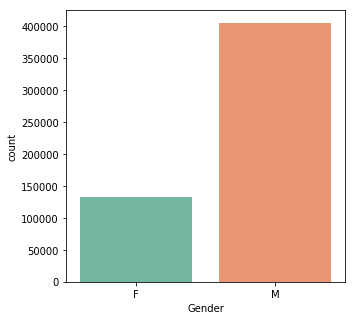

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(data.Gender,palette="Set2")
plt.show()

In [23]:
data.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

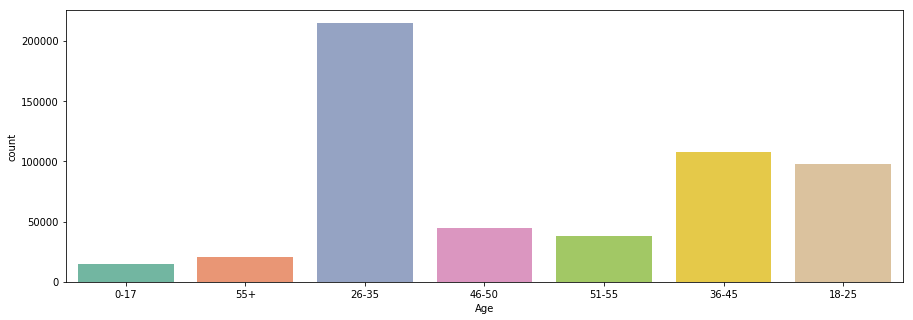

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data.Age,palette="Set2")
plt.show()

In [25]:
data.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

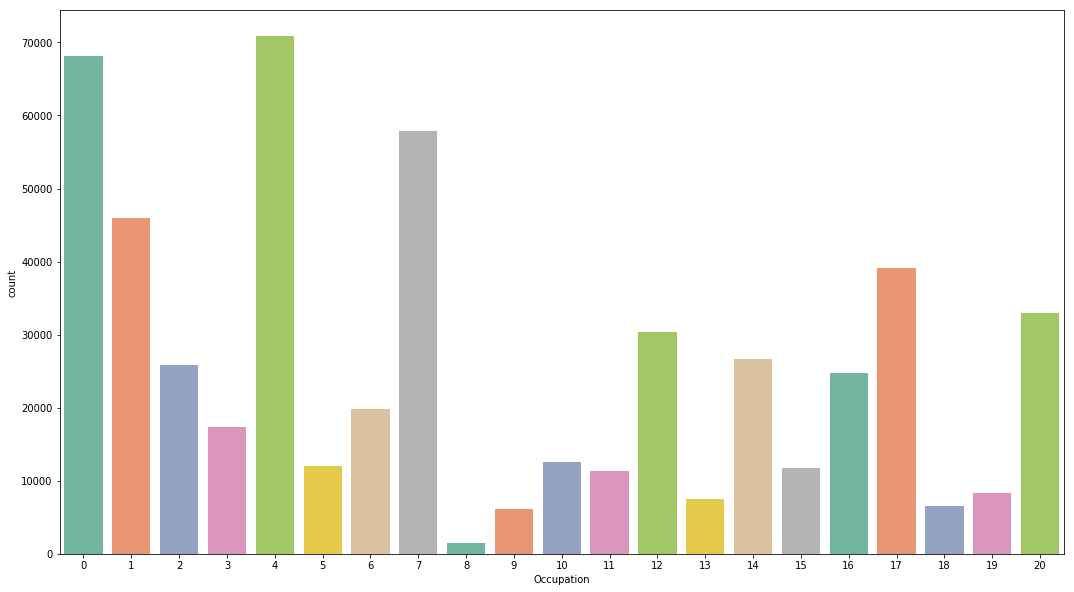

In [26]:
plt.figure(figsize=(18,10))
sns.countplot(data.Occupation,palette="Set2")
plt.show()

In [27]:
data.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

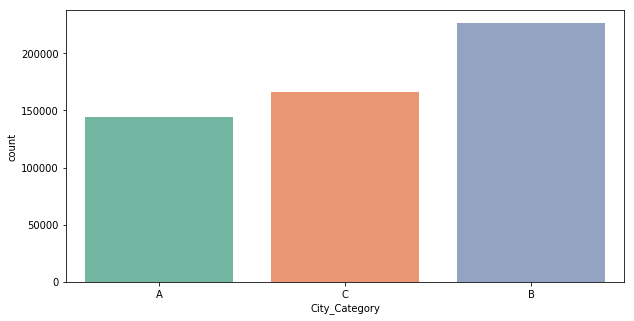

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data.City_Category,palette="Set2")
plt.show()


In [29]:
data.City_Category.value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

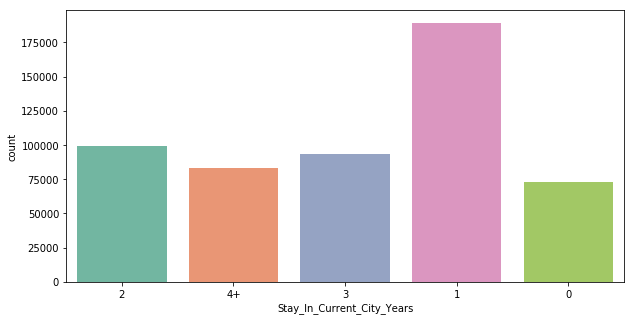

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data.Stay_In_Current_City_Years,palette='Set2')
plt.show()

In [31]:
data.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

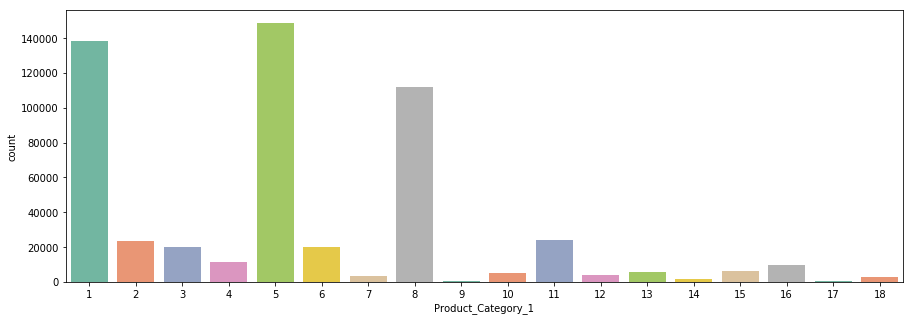

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(data.Product_Category_1,palette='Set2')
plt.show()

In [33]:
data.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

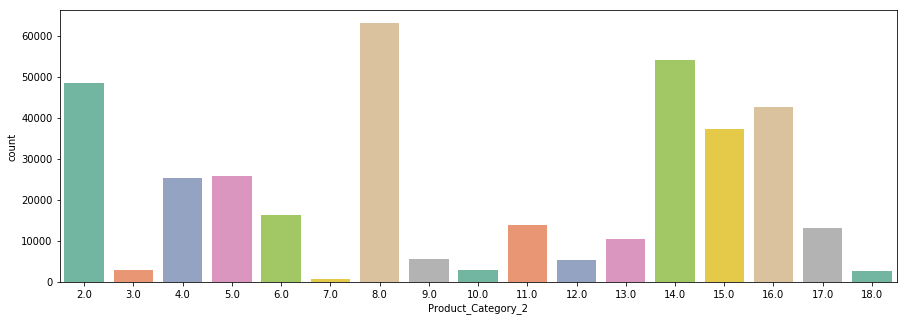

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data.Product_Category_2,palette='Set2')
plt.show()

In [35]:
data.Product_Category_2.value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

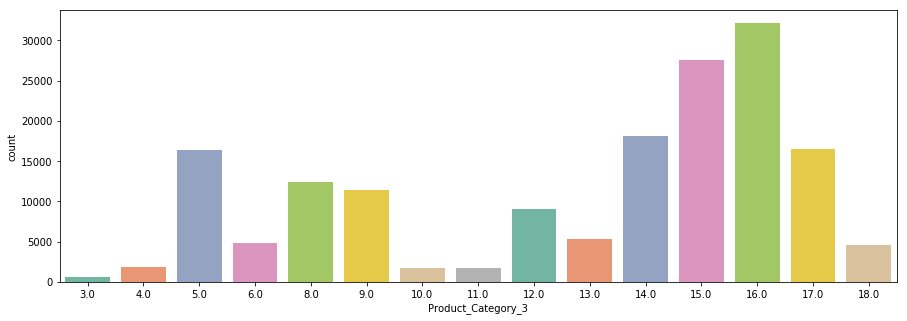

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data.Product_Category_3,palette='Set2')
plt.show()

In [37]:
data.Product_Category_3.value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

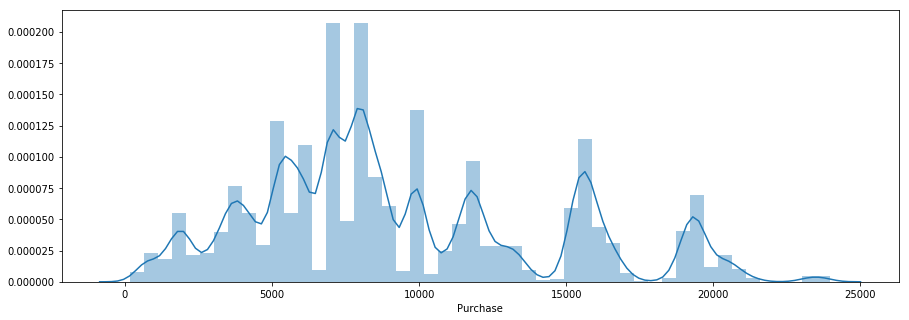

In [38]:
plt.figure(figsize=(15,5))
sns.distplot(data.Purchase)
plt.show()

In [39]:
data.Purchase.value_counts()

6855     186
7011     185
7193     182
6891     182
6879     181
7027     180
7012     180
6883     179
7166     179
7165     179
6960     178
6868     176
7089     176
7093     176
6923     176
6858     176
7167     175
7114     175
7185     174
6931     174
7060     174
6928     174
6973     173
6904     173
7146     173
7047     173
7108     172
7034     171
6908     171
7010     171
        ... 
14891      1
21279      1
2686       1
21486      1
14968      1
10362      1
23856      1
14456      1
20974      1
18550      1
14609      1
5678       1
23481      1
23669      1
14568      1
6781       1
4732       1
4921       1
14969      1
17203      1
17014      1
23157      1
21108      1
14890      1
23344      1
18719      1
898        1
14457      1
13947      1
3326       1
Name: Purchase, Length: 17959, dtype: int64

# Bivarient Analysis

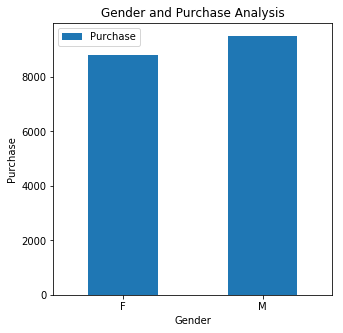

In [40]:
Gender_pivot =data.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

Gender_pivot.plot(kind='bar',figsize=(5,5))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()

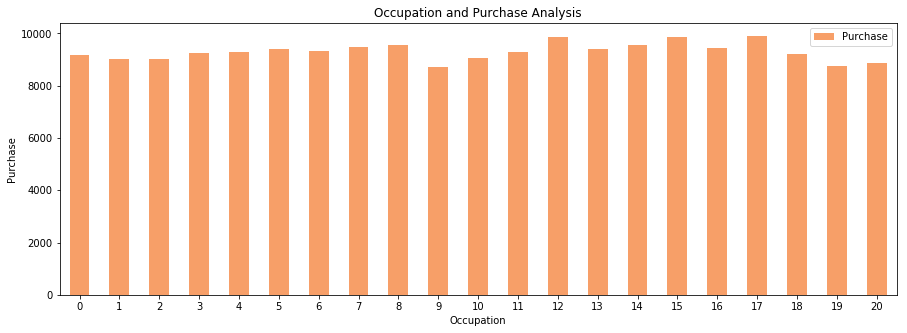

In [41]:
Occupation_pivot =data.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='#f79f68',figsize=(15,5))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Occupation and Purchase Analysis")
plt.show()

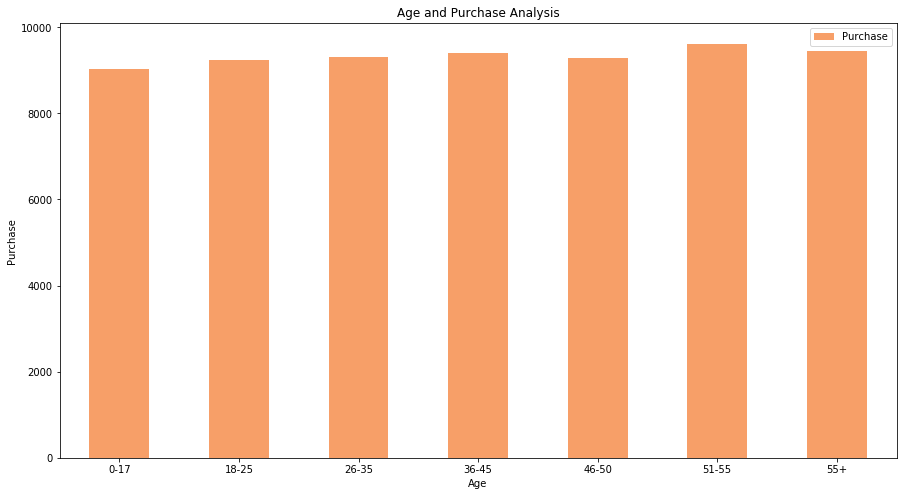

In [42]:
Age_pivot =data.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
Age_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Age and Purchase Analysis")
plt.show()

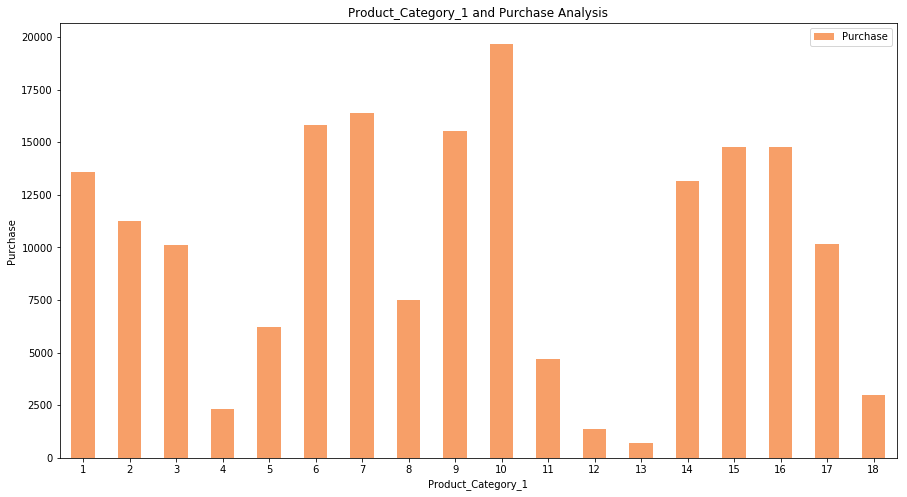

In [43]:
Product_Category_1_pivot =data.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_Category_1_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

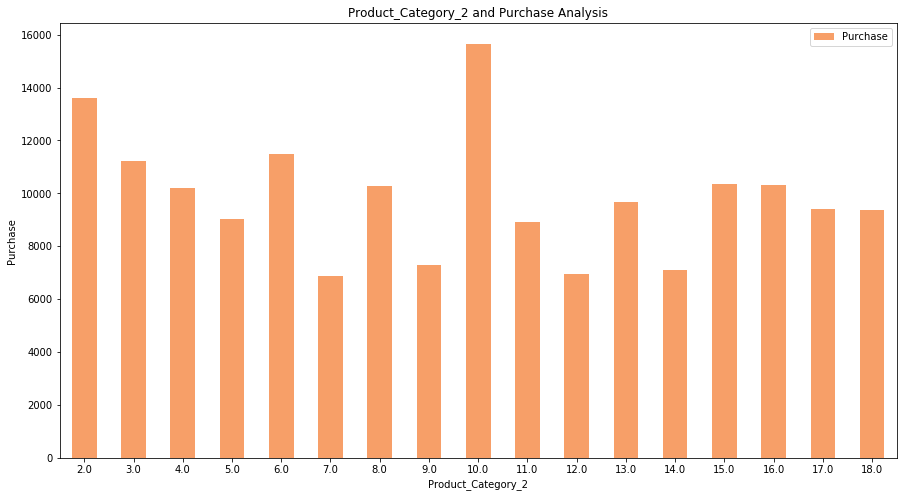

In [44]:
Product_Category_2_pivot =data.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_Category_2_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Product_Category_2 and Purchase Analysis")
plt.show()

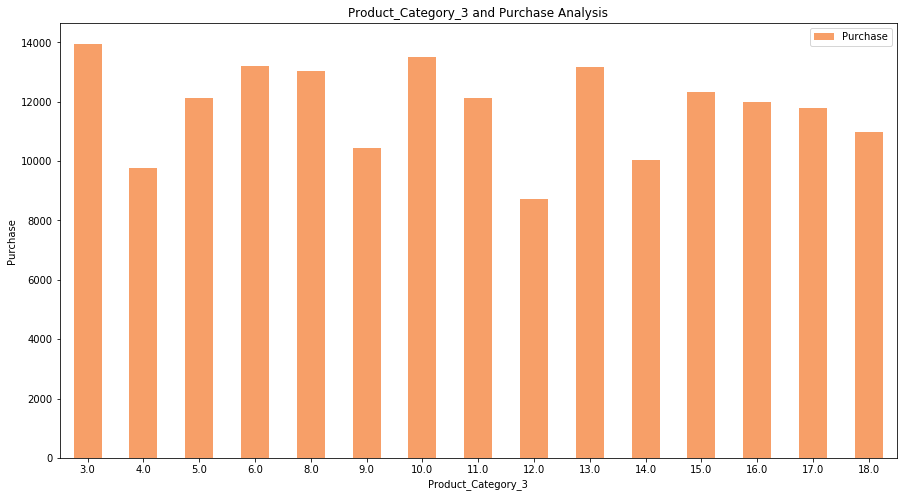

In [45]:
Product_Category_3_pivot =data.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Product_Category_3_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Product_Category_3 and Purchase Analysis")
plt.show()

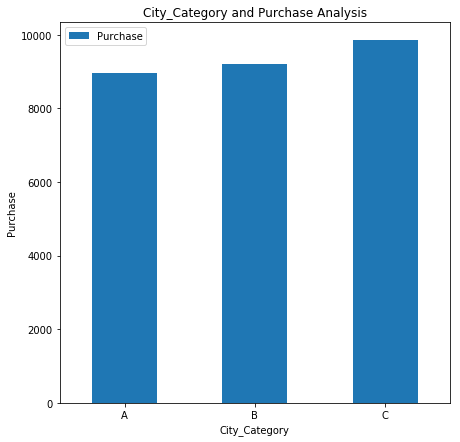

In [46]:
City_Category_pivot =data.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
City_Category_pivot.plot(kind='bar',figsize=(7,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("City_Category and Purchase Analysis")
plt.show()

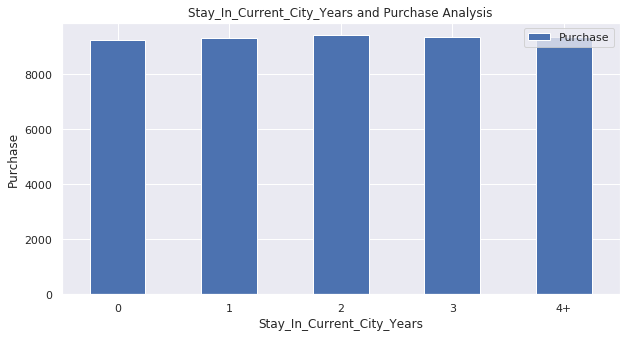

In [47]:
sns.set()
Stay_In_Current_City_Years_pivot =data.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

# Data Pre-processing

In [0]:
row,col=data.shape

In [49]:
data.isnull().sum()/row*100


User_ID                        0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Product_ID                     0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

In [50]:
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Product_ID                     3623
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

In [51]:
data.shape

(537577, 11)

In [0]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace({'4+': 4})

In [0]:
def remove_P(value):
  try:
    value=value[1:]
    return value
  except:
    TypeError

In [0]:
data.Product_ID=data.Product_ID.apply(remove_P)

In [0]:
data.Product_ID=data.Product_ID.astype('int32')

# Feature Engineering

In [0]:
gender_dict = {'F':0, 'M':1}
data.Gender = data.Gender.apply(lambda x: gender_dict[x])


In [57]:
data.Gender.value_counts()

1    405380
0    132197
Name: Gender, dtype: int64

In [58]:
age_dict={'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}

data.Age=data.Age.apply(lambda x: age_dict[x])
data.Age.value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

In [59]:
city_dict={'A':0,'B':1,'C':2}

data.City_Category=data.City_Category.apply(lambda x: city_dict[x])
data.City_Category.value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

In [60]:
data.head(5)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,0,2,69042,3,NaN,NaN,8370
1,1000001,0,0,10,0,2,248942,1,6.0,14.0,15200
2,1000001,0,0,10,0,2,87842,12,NaN,NaN,1422
3,1000001,0,0,10,0,2,85442,12,14.0,NaN,1057
4,1000002,1,6,16,2,4,285442,8,NaN,NaN,7969


In [61]:
data['User_ID'].nunique()

5891

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Product_ID                    537577 non-null int32
Product_Category_1            537577 non-null int32
Product_Category_2            370591 non-null float32
Product_Category_3            164278 non-null float32
Purchase                      537577 non-null int32
dtypes: float32(2), int32(3), int64(6)
memory usage: 34.9 MB


In [63]:
data.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.031898,0.033359,-0.023024,0.024107,-0.030655,-0.017312,0.003687,0.001471,0.004045,0.005389
Gender,-0.031898,1.000000,-0.004413,0.117294,-0.004129,0.015392,0.022537,-0.045661,-0.018440,0.028403,0.060086
Age,0.033359,-0.004413,1.000000,0.091898,0.122308,-0.004754,0.028035,0.061951,0.054762,0.057155,0.017717
Occupation,-0.023024,0.117294,0.091898,1.000000,0.033781,0.031203,0.009253,-0.008114,-0.000031,0.013452,0.021104
City_Category,0.024107,-0.004129,0.122308,0.033781,1.000000,0.019948,0.004321,-0.027444,-0.012120,-0.002672,0.068507
Stay_In_Current_City_Years,-0.030655,0.015392,-0.004754,0.031203,0.019948,1.000000,-0.003055,-0.004182,-0.001781,0.002039,0.005470
Product_ID,-0.017312,0.022537,0.028035,0.009253,0.004321,-0.003055,1.000000,0.040065,0.034281,0.045439,-0.079774
Product_Category_1,0.003687,-0.045661,0.061951,-0.008114,-0.027444,-0.004182,0.040065,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.018440,0.054762,-0.000031,-0.012120,-0.001781,0.034281,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.028403,0.057155,0.013452,-0.002672,0.002039,0.045439,0.229490,0.543544,1.000000,-0.022257


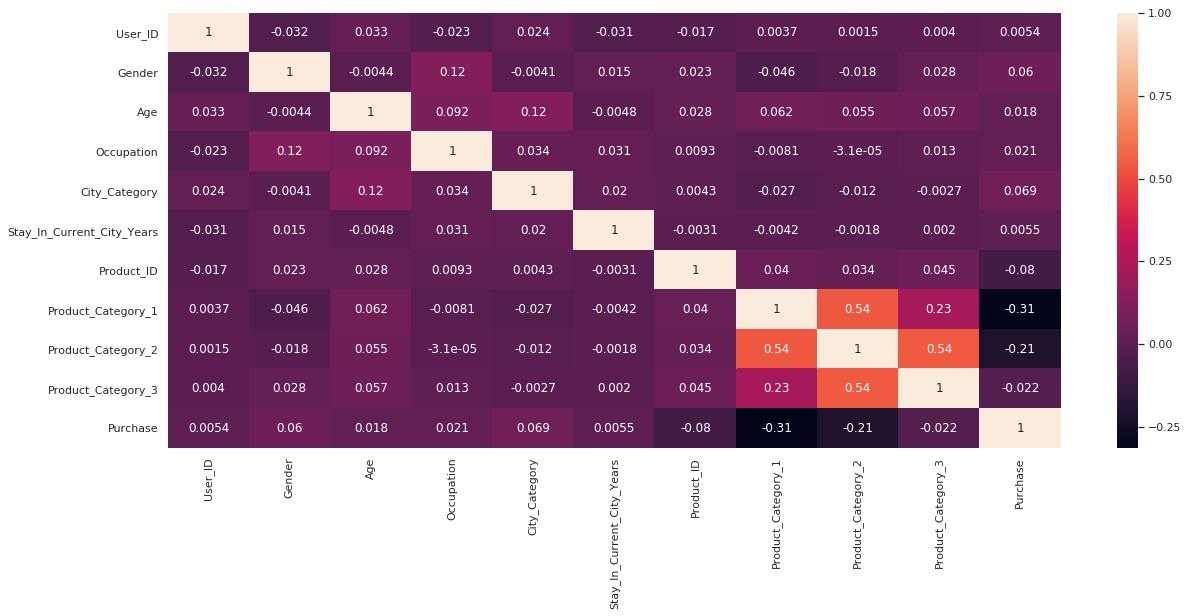

In [64]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


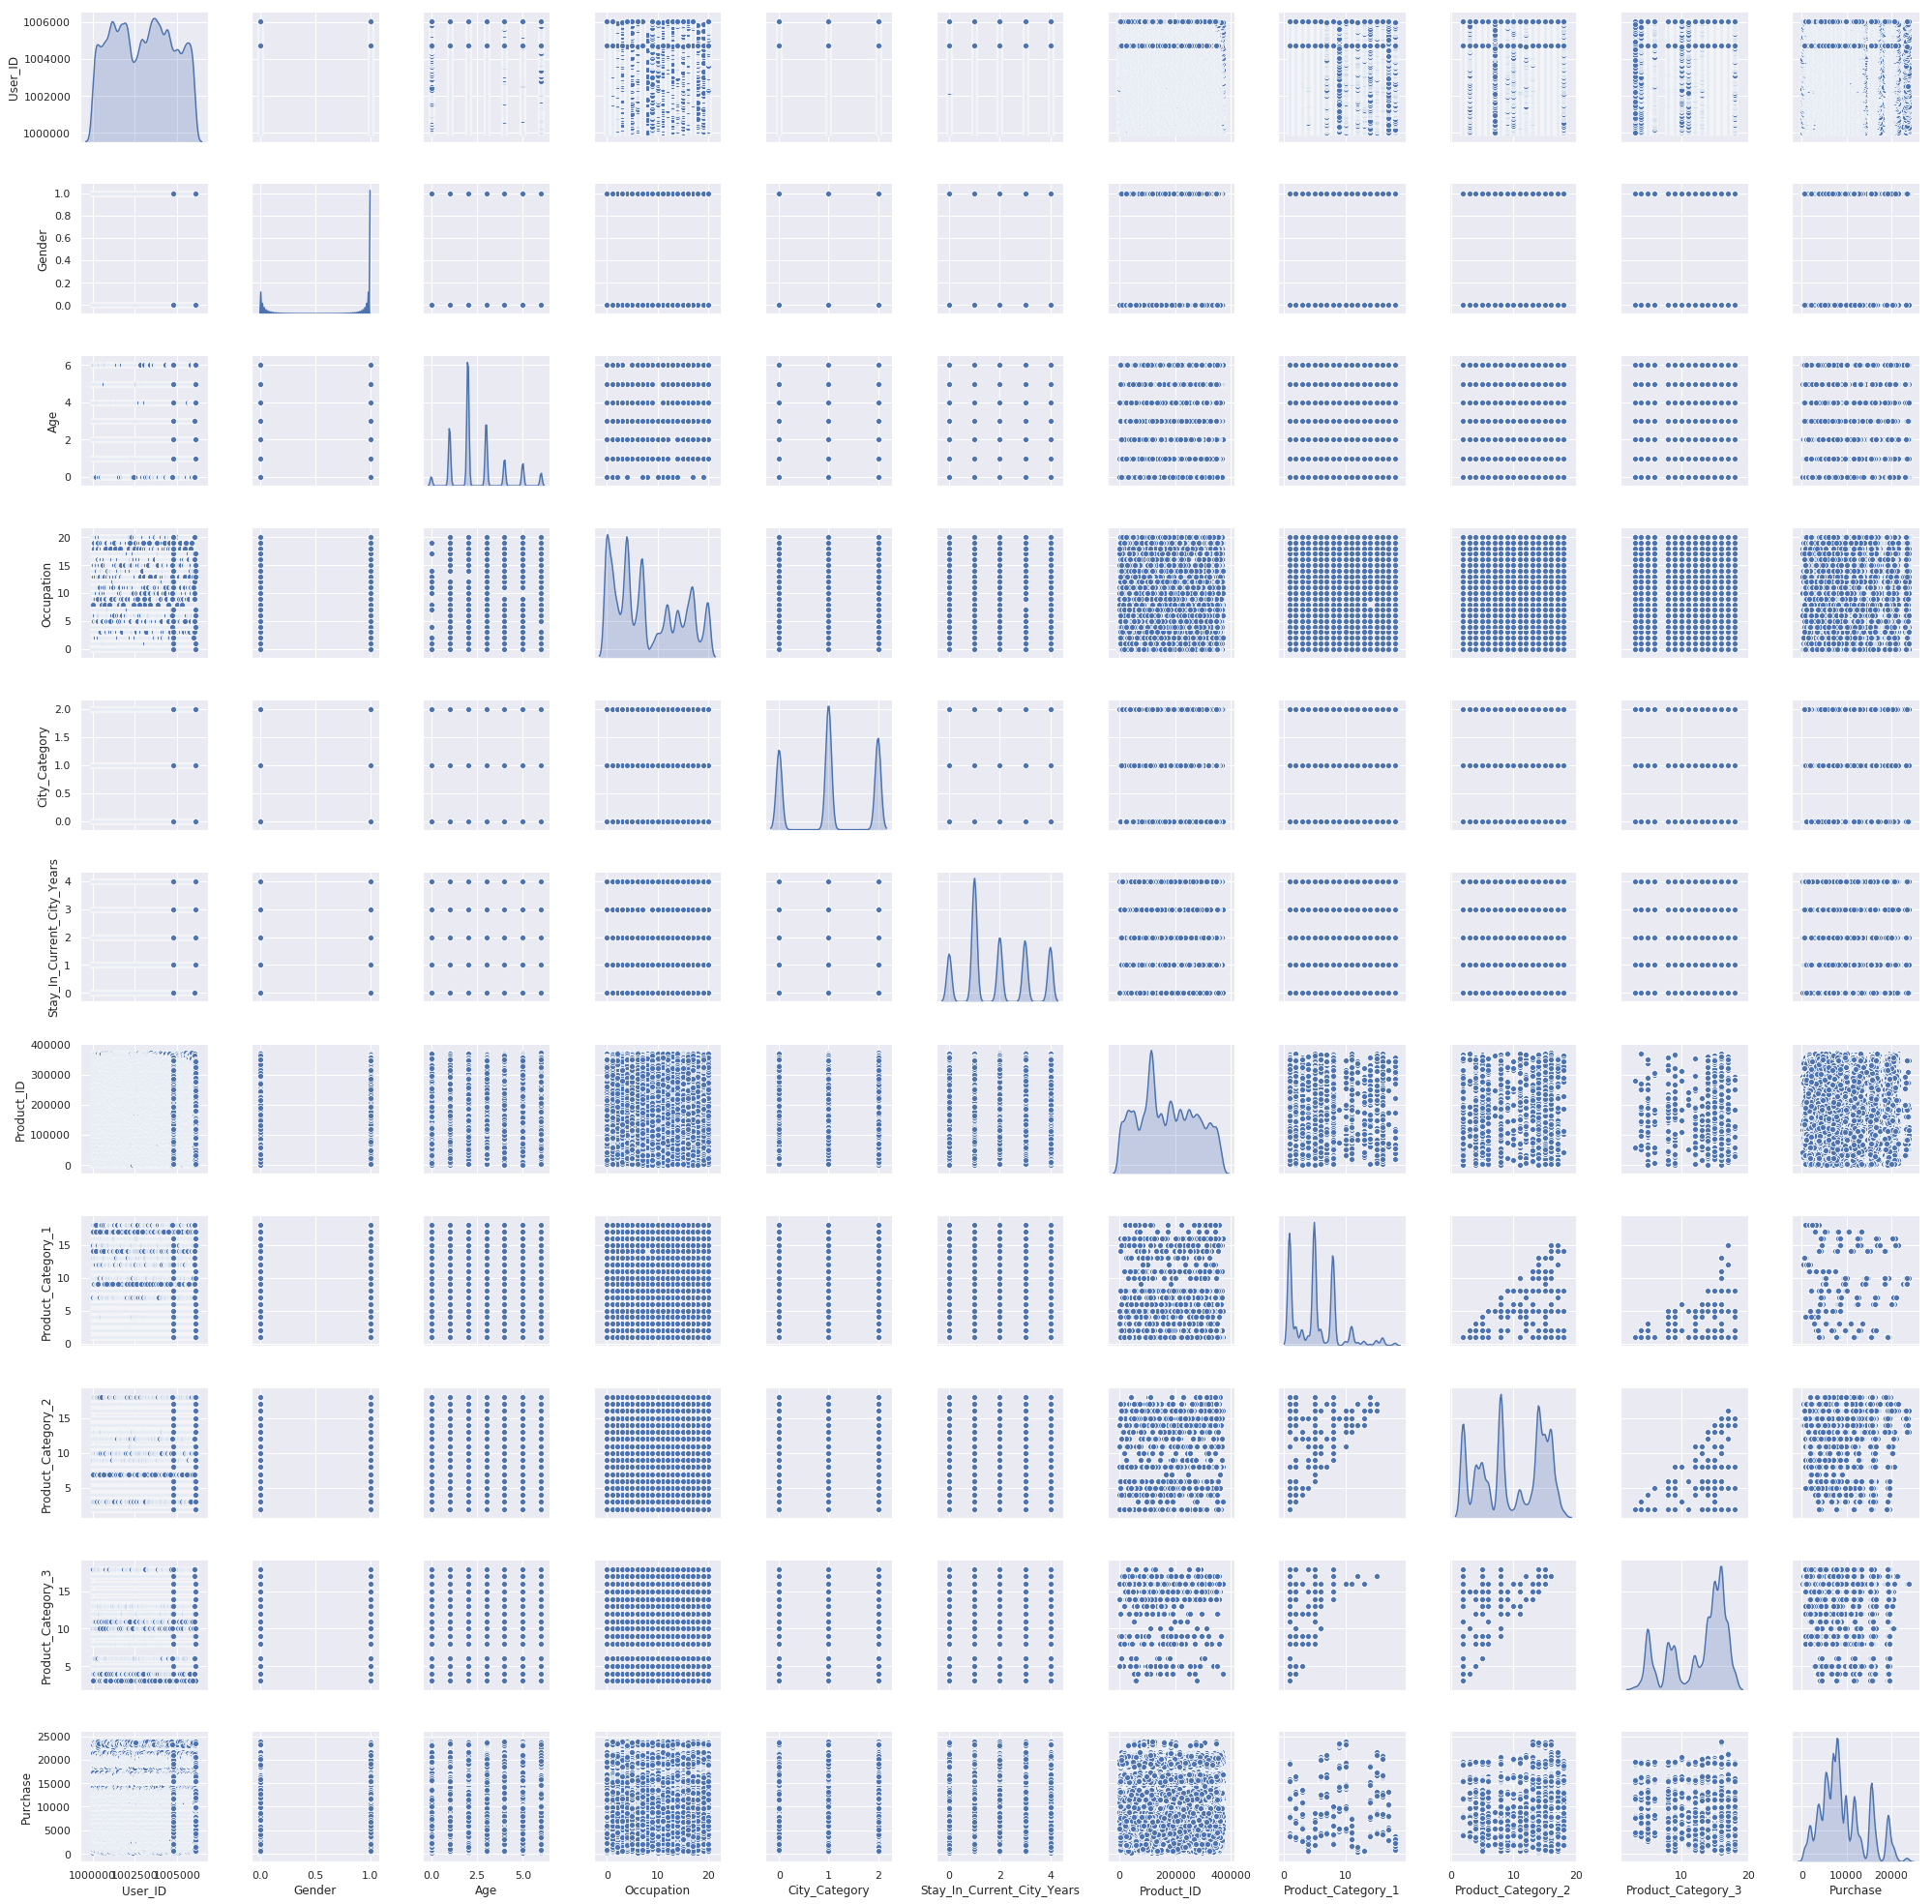

In [65]:
sns.pairplot(data,diag_kind='kde')
plt.show()

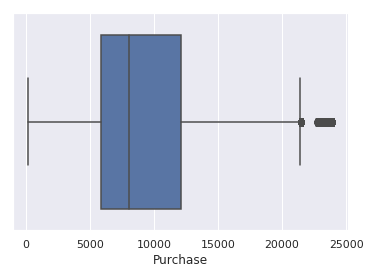

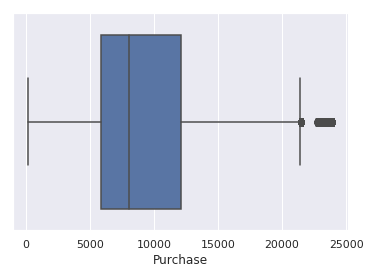

In [129]:
sns.boxplot(data.Purchase)

In [130]:
data.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

KeyError: ignored

In [0]:
data_with_dummy=pd.get_dummies(data=data,columns=['Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1'], drop_first=False)

In [132]:
len(data_with_dummy.columns)

59

In [133]:
data_with_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 59 columns):
User_ID                         537577 non-null int64
Gender                          537577 non-null int64
Product_ID                      537577 non-null int32
Purchase                        537577 non-null int32
Cluster_No                      537577 non-null int32
Age_0                           537577 non-null uint8
Age_1                           537577 non-null uint8
Age_2                           537577 non-null uint8
Age_3                           537577 non-null uint8
Age_4                           537577 non-null uint8
Age_5                           537577 non-null uint8
Age_6                           537577 non-null uint8
Occupation_0                    537577 non-null uint8
Occupation_1                    537577 non-null uint8
Occupation_2                    537577 non-null uint8
Occupation_3                    537577 non-null uint8
Occupation_4             

In [0]:
data_cluster=data_with_dummy.drop(['User_ID','Purchase','Product_ID'],axis=1)

In [0]:
usr_cout=data.groupby('User_ID',as_index=False)['Product_ID'].count()

In [136]:
data.Product_ID.value_counts()

265242    1858
110742    1591
25442     1586
112142    1539
57642     1430
184942    1424
46742     1417
58042     1396
59442     1384
145042    1384
237542    1374
255842    1354
117942    1346
110942    1336
10742     1331
110842    1260
220442    1253
51442     1233
102642    1228
117442    1227
278642    1213
242742    1194
34742     1188
80342     1186
148642    1179
28842     1172
31042     1168
251242    1167
114942    1162
270942    1141
          ... 
315242       1
364342       1
239442       1
65542        1
54442        1
126742       1
172642       1
314842       1
149742       1
68742        1
206542       1
81342        1
231642       1
62342        1
299042       1
12342        1
107942       1
203242       1
307242       1
53242        1
364542       1
77542        1
241842       1
301942       1
69642        1
203942       1
56542        1
132742       1
338242       1
167242       1
Name: Product_ID, Length: 3623, dtype: int64

In [0]:
final_data=pd.merge(usr_cout,data,on='User_ID',how='inner')

In [138]:
final_data.Product_ID_x.unique()

array([  34,   76,   29,   13,  106,   46,   16,   57,  222,   69,   11,
         60,  116,   21,  114,  179,  144,   12,  155,  171,   43,  226,
         41,   52,   30,   64,   23,  215,   99,  111,  199,   40,   15,
        124,  120,  162,   20,   14,  337,   59,   24,   25,   42,  377,
         37,  260,  127,   35,   19,  281,   63,   66,   36,   26,  133,
         28,  110,   51,   85,   31,   22,   33,  137,  223,    7,   55,
         82,   65,   86,   54,  282,  118,   56,   32,  352,  100,   84,
         79,  152,   45,   92,  101,   38,  227,  136,  238,   95,  338,
        333,  134,  283,   17,   53,  217,    9,  184,  271,   18,  216,
        312,  314,  170,   39,  169,   58,  243,   80,  284,  466,  207,
        206,  379,  246,  108,   67,   93,  429,   49,  130,  292,   10,
        268,   88,  139,   27,  165,   50,  435,   62,   75,   89,   48,
        274,   77,  143,  188,  279,   78,  113,  275,  175,  104,   47,
        154,  203,  454,  112,  322,  121,  173,  4

In [0]:
data_cluster["User_count"]=final_data.Product_ID_x

In [140]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Product_ID_x                  537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Product_ID_y                  537577 non-null int32
Product_Category_1            537577 non-null int32
Purchase                      537577 non-null int32
Cluster_No                    537577 non-null int32
dtypes: int32(4), int64(7)
memory usage: 41.0 MB


In [141]:
data_cluster.head()

,Gender,Cluster_No,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,User_count
0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
2,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,34
3,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,34
4,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34


In [0]:
SC=StandardScaler()
final_cluster=SC.fit_transform(data_cluster)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_cluster=scaler.fit_transform(data_cluster)

In [144]:
cluster_range=range(2,11)
cluster_errors=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10)
  clusters.fit(final_cluster)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,2.056494e+06
1,3,1.897380e+06
2,4,1.828501e+06
3,5,1.773963e+06
4,6,1.731724e+06
5,7,1.699300e+06
6,8,1.662664e+06
7,9,1.642357e+06
8,10,1.600543e+06


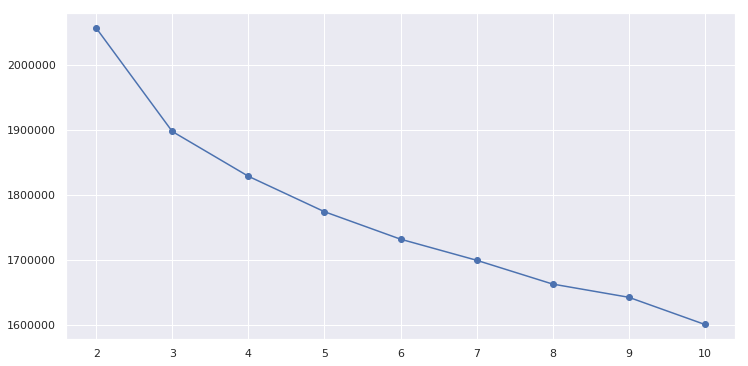

In [145]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
Kmean_cluster=KMeans(7,random_state=0)
predict=Kmean_cluster.fit_predict(data_cluster)

In [0]:
data['Cluster_No']=predict

In [148]:
data.head(10)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
0,1000001,0,0,10,0,2,69042,3,8370,4
1,1000001,0,0,10,0,2,248942,1,15200,4
2,1000001,0,0,10,0,2,87842,12,1422,4
3,1000001,0,0,10,0,2,85442,12,1057,4
4,1000002,1,6,16,2,4,285442,8,7969,4
5,1000003,1,2,15,0,3,193542,1,15227,4
6,1000004,1,4,7,1,2,184942,1,19215,4
7,1000004,1,4,7,1,2,346142,1,15854,4
8,1000004,1,4,7,1,2,97242,1,15686,4
9,1000005,1,2,20,0,1,274942,8,7871,4


In [149]:
data.Cluster_No.unique()

array([4, 1, 3, 2, 6, 0, 5])

In [150]:
data.Cluster_No.value_counts()

4    171064
1    131676
3    100999
2     62190
6     50834
0     16230
5      4584
Name: Cluster_No, dtype: int64

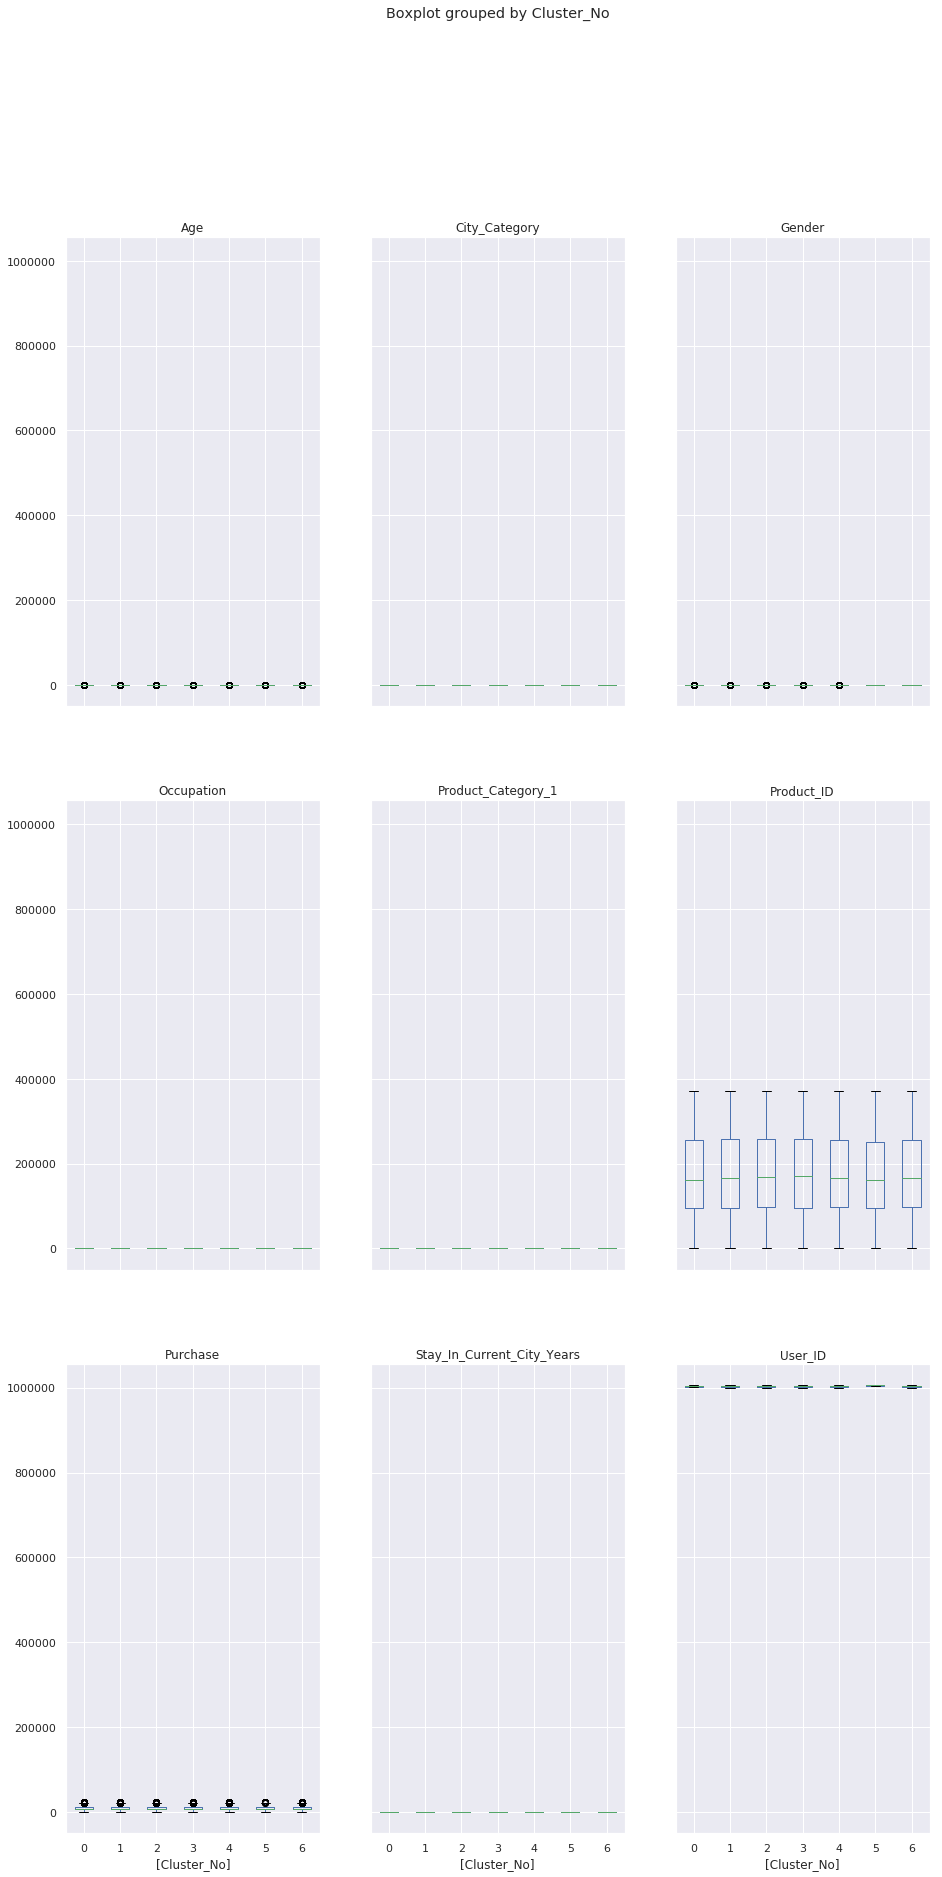

In [151]:
data.boxplot(by = 'Cluster_No',  layout=(4,3), figsize=(15, 40))
plt.show()

In [152]:
data.Cluster_No.value_counts()

4    171064
1    131676
3    100999
2     62190
6     50834
0     16230
5      4584
Name: Cluster_No, dtype: int64

In [0]:
data_Cluster_0=data[data['Cluster_No']==0]

In [154]:
data_Cluster_0.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
34759,1005365,1,1,12,2,0,255842,16,20190,0
34760,1005365,1,1,12,2,0,2542,8,7876,0
34761,1005365,1,1,12,2,0,42842,5,8863,0
34762,1005365,1,1,12,2,0,211142,5,7090,0
34763,1005365,1,1,12,2,0,129842,6,15971,0


In [155]:
data_Cluster_1=data[data['Cluster_No']==1]
data_Cluster_1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
152,1000029,1,3,7,2,1,233542,1,19068,1
153,1000029,1,3,7,2,1,127242,1,7963,1
154,1000029,1,3,7,2,1,349942,1,15511,1
155,1000029,1,3,7,2,1,303342,1,11859,1
156,1000030,0,3,7,2,3,51442,8,9735,1


In [156]:
data_Cluster_2=data[data['Cluster_No']==2]
data_Cluster_2.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
3527,1000568,0,5,17,2,1,184942,1,19600,2
3528,1000568,0,5,17,2,1,130742,1,19514,2
3529,1000569,0,1,4,2,3,302442,5,7064,2
3530,1000569,0,1,4,2,3,5342,4,2136,2
3531,1000569,0,1,4,2,3,251942,1,15361,2


In [157]:
data_Cluster_3=data[data['Cluster_No']==3]
data_Cluster_3.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
453,1000080,1,6,1,2,3,64042,3,8248,3
454,1000081,0,2,0,0,1,344242,8,10058,3
455,1000082,1,2,17,2,2,15542,1,8162,3
456,1000082,1,2,17,2,2,1642,8,8045,3
457,1000083,0,2,2,2,1,105142,1,15584,3


In [158]:
data_Cluster_4=data[data['Cluster_No']==4]
data_Cluster_4.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
0,1000001,0,0,10,0,2,69042,3,8370,4
1,1000001,0,0,10,0,2,248942,1,15200,4
2,1000001,0,0,10,0,2,87842,12,1422,4
3,1000001,0,0,10,0,2,85442,12,1057,4
4,1000002,1,6,16,2,4,285442,8,7969,4


In [159]:
data_Cluster_5=data[data['Cluster_No']==5]
data_Cluster_5.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
74185,1005433,0,3,17,1,3,311442,11,3052,5
74186,1005433,0,3,17,1,3,258442,5,8610,5
74187,1005433,0,3,17,1,3,354442,5,5262,5
74188,1005434,0,2,7,0,1,197942,6,16656,5
74189,1005434,0,2,7,0,1,14542,8,8076,5


In [160]:
data_Cluster_6=data[data['Cluster_No']==6]
data_Cluster_6.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_ID,Product_Category_1,Purchase,Cluster_No
15390,1002303,1,5,17,1,4,329242,5,7093,6
15391,1002303,1,5,17,1,4,128742,1,15867,6
15392,1002303,1,5,17,1,4,642,1,15524,6
15393,1002303,1,5,17,1,4,171342,13,756,6
15394,1002303,1,5,17,1,4,244742,11,4597,6


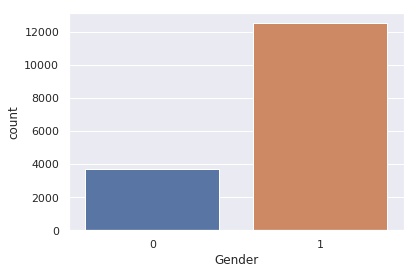

In [161]:
sns.countplot(data_Cluster_0.Gender)

In [162]:
data_Cluster_0.Gender.value_counts()

1    12519
0     3711
Name: Gender, dtype: int64

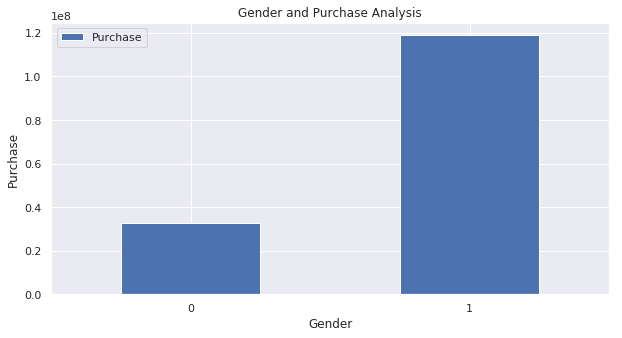

In [163]:
sns.set()
Cluster_0_Gender_pivot =data_Cluster_0.pivot_table(index='Gender', values="Purchase", aggfunc=np.sum)
Cluster_0_Gender_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()

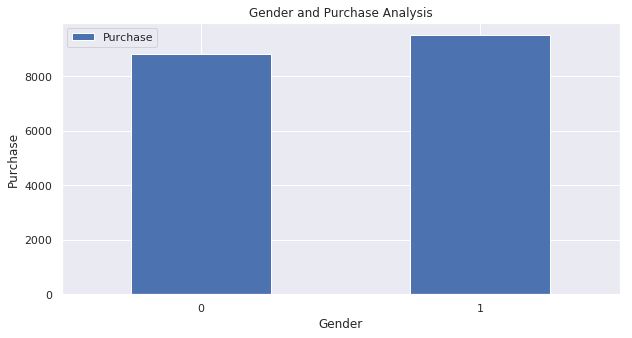

In [164]:
sns.set()
Cluster_0_Gender_pivot =data_Cluster_0.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Cluster_0_Gender_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()

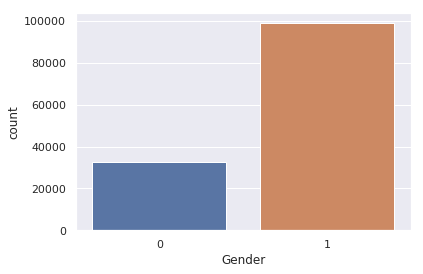

In [165]:
sns.countplot(data_Cluster_1.Gender)

In [166]:
data_Cluster_1.Gender.value_counts()

1    98986
0    32690
Name: Gender, dtype: int64

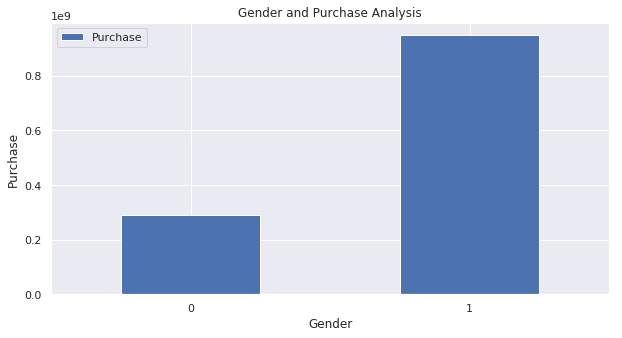

In [167]:
sns.set()
Cluster_1_Gender_pivot =data_Cluster_1.pivot_table(index='Gender', values="Purchase", aggfunc=np.sum)
Cluster_1_Gender_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()

In [168]:
print(Cluster_1_Gender_pivot)

         Purchase
Gender           
0       289021678
1       946813942


In [0]:
data_for_tableau['Cluster_No']=predict

In [170]:
TOP_100_Product=data[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(100)
TOP_100_Product

,Purchase
Product_ID,
25442,27532426
110742,26382569
255842,24652442
184942,24060871
59442,23948299
112142,23882624
110942,23232538
237542,23096487
57642,22493690


In [171]:
TOP_Product_Clsuter_0=data_Cluster_0[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(3)
TOP_Product_Clsuter_0

,Purchase
Product_ID,
25442,832906
184942,831524
145042,790941


In [172]:
data_Cluster_0.Product_ID.value_counts()

265242    61
145042    52
51442     50
25442     49
58042     48
184942    48
59442     45
334242    44
46742     44
57642     43
34742     43
117942    42
110742    41
112142    40
278642    40
112542    40
251242    38
255842    38
142       38
324942    37
114942    37
80342     37
148642    37
270942    36
102642    36
28842     36
10742     36
296042    35
117442    35
248142    35
          ..
94442      1
367442     1
260942     1
312942     1
176442     1
138042     1
228142     1
282942     1
301842     1
126942     1
20442      1
228342     1
7242       1
3842       1
253042     1
216842     1
356142     1
130142     1
23642      1
142442     1
214742     1
91842      1
108242     1
293942     1
277542     1
171042     1
167842     1
290742     1
94142      1
340842     1
Name: Product_ID, Length: 2581, dtype: int64

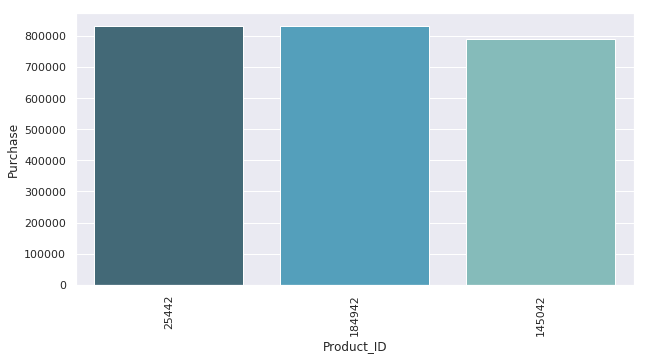

In [173]:
#TOP_15_Clsuter_0.plot(kind='bar',figsize=(10,15))
plt.figure(figsize=(10,5))
sns.barplot(x=TOP_Product_Clsuter_0.index,y='Purchase',data=TOP_Product_Clsuter_0,order=TOP_Product_Clsuter_0.index,palette="GnBu_d")
plt.xticks(rotation=90)
plt.show()

In [174]:
TOP_Product_Clsuter_1=data_Cluster_1[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(25)
TOP_Product_Clsuter_1

,Purchase
Product_ID,
110742,6648003
25442,6517518
112142,6395805
184942,6335158
255842,6320543
59442,5949220
110942,5911331
28842,5789414
57642,5652479


In [175]:
data_Cluster_1.Product_ID.value_counts()

265242    478
112142    413
110742    399
184942    375
25442     372
57642     361
46742     354
255842    347
59442     345
58042     340
237542    340
10742     338
110942    338
117942    330
278642    327
117442    326
28842     323
220442    315
145042    313
31042     309
110842    309
102642    305
51442     304
242742    302
142       301
148642    293
114942    292
80342     282
251242    277
334242    276
         ... 
284542      1
79042       1
96242       1
137942      1
69442       1
203042      1
239442      1
39342       1
154942      1
189942      1
250142      1
102742      1
152342      1
284342      1
301342      1
171942      1
63242       1
291642      1
128642      1
299342      1
99142       1
261042      1
206542      1
72042       1
107842      1
270442      1
323142      1
167242      1
341042      1
326042      1
Name: Product_ID, Length: 3373, dtype: int64

In [176]:
TOP_Product_Clsuter_2=data_Cluster_2[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(12)
TOP_Product_Clsuter_2

,Purchase
Product_ID,
110742,3217170
255842,2968456
110942,2859979
237542,2831796
184942,2777804
59442,2734497
25442,2659423
57642,2624606
112142,2565097


In [177]:
data_Cluster_2.Product_ID.value_counts()

265242    199
110742    193
117942    172
237542    167
57642     167
59442     164
112142    164
110942    164
58042     163
184942    163
255842    163
117442    154
25442     154
46742     153
102642    151
242742    149
110842    145
278642    144
145042    144
10742     143
220442    141
148642    138
31042     135
34742     134
114942    133
112542    133
251242    127
142       126
295942    124
44442     123
         ... 
42042       1
186942      1
9642        1
295142      1
362142      1
67342       1
73142       1
280042      1
106142      1
153542      1
122142      1
12542       1
61542       1
55542       1
342442      1
252342      1
173142      1
312442      1
142642      1
167142      1
40542       1
314542      1
109442      1
187542      1
23942       1
335342      1
76242       1
10642       1
51342       1
76642       1
Name: Product_ID, Length: 3184, dtype: int64

In [178]:
TOP_Product_Clsuter_3=data_Cluster_3[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(18)
TOP_Product_Clsuter_3

,Purchase
Product_ID,
25442,5579500
184942,4814394
255842,4707579
112142,4687186
110742,4655004
10742,4634983
57642,4335858
145042,4290684
237542,4220566


In [179]:
data_Cluster_3.Product_ID.value_counts()

265242    340
25442     316
112142    300
145042    295
110742    291
10742     288
184942    288
57642     273
46742     266
255842    258
237542    249
58042     247
117942    243
251242    240
220442    239
102642    239
59442     235
110942    233
110842    233
34742     230
80342     229
270942    227
117442    223
51442     222
114942    221
148642    219
334242    217
28842     217
31042     216
142       216
         ... 
107742      1
212642      1
143442      1
138742      1
353542      1
236742      1
49042       1
23742       1
189942      1
295142      1
99142       1
17342       1
200942      1
66042       1
259642      1
109442      1
281342      1
338642      1
213442      1
148242      1
234342      1
132442      1
239042      1
144742      1
181042      1
279742      1
337042      1
307842      1
361542      1
151542      1
Name: Product_ID, Length: 3308, dtype: int64

In [180]:
TOP_Product_Clsuter_4=data_Cluster_4[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(32)
TOP_Product_Clsuter_4

,Purchase
Product_ID,
25442,8951696
110742,8620181
237542,7603485
59442,7592237
255842,7489947
110942,7252580
80342,7102200
112142,7069677
184942,6992444


In [181]:
data_Cluster_4.Product_ID.value_counts()

265242    578
25442     520
110742    516
112142    455
46742     452
237542    450
58042     439
59442     433
117942    433
145042    428
57642     427
110942    423
184942    416
255842    411
110842    408
51442     408
80342     403
10742     402
220442    398
148642    387
278642    382
270942    377
242742    376
117442    369
28842     369
34742     366
102642    358
114942    356
112542    356
31042     353
         ... 
298842      1
257142      1
142042      1
137342      1
248242      1
58542       1
317742      1
55342       1
336242      1
133242      1
242242      1
100542      1
326342      1
348142      1
332742      1
275042      1
102742      1
320642      1
295642      1
143542      1
91442       1
228842      1
53242       1
364242      1
13842       1
243042      1
362242      1
91942       1
22042       1
270442      1
Name: Product_ID, Length: 3446, dtype: int64

In [182]:
TOP_Product_Clsuter_5=data_Cluster_5[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(1)
TOP_Product_Clsuter_5

,Purchase
Product_ID,
59442,322000


In [183]:
data_Cluster_5.Product_ID.value_counts()

59442     19
110542    18
110842    18
110742    17
112142    17
34742     17
85942     16
25442     15
145042    15
220442    15
237542    14
58042     13
86442     13
259342    12
265242    12
46742     12
111142    12
102642    12
10742     12
110942    12
216342    12
184942    11
127642    11
242742    11
57442     11
278642    11
323942    11
5042      11
14542     11
255842    11
          ..
304942     1
64042      1
162342     1
205842     1
1842       1
3542       1
170642     1
222942     1
322742     1
41442      1
157342     1
47942      1
80642      1
356542     1
269042     1
162542     1
272042     1
173742     1
244442     1
116442     1
129742     1
8442       1
15042      1
83642      1
6842       1
304842     1
293542     1
323342     1
108242     1
167942     1
Name: Product_ID, Length: 1687, dtype: int64

In [184]:
TOP_Product_Clsuter_6=data_Cluster_6[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(9)
TOP_Product_Clsuter_6

,Purchase
Product_ID,
25442,2732096
59442,2498709
57642,2392046
255842,2318082
110942,2291422
112142,2277462
110742,2260135
184942,2126383
237542,2021132


In [185]:
data_Cluster_6.Product_ID.value_counts()

265242    190
25442     160
112142    150
57642     148
58042     146
59442     143
145042    137
46742     136
110742    134
34742     133
251242    132
110942    131
102642    127
255842    126
184942    123
237542    120
51442     120
31042     119
117942    118
114942    117
242742    115
117442    114
80342     113
110842    113
10742     112
220442    111
142       109
28842     108
270942    105
334242    104
         ... 
320242      1
279142      1
88442       1
350842      1
326542      1
39842       1
141142      1
362242      1
18442       1
83642       1
74742       1
369542      1
149642      1
107142      1
262642      1
336342      1
123342      1
131442      1
360642      1
295042      1
82042       1
368742      1
90142       1
90042       1
24442       1
253642      1
64942       1
171042      1
318442      1
363842      1
Name: Product_ID, Length: 3079, dtype: int64

In [186]:
TOP_User_Clsuter_0=data_Cluster_0[['User_ID','Purchase']].groupby('User_ID').sum().sort_values('Purchase',ascending=False)
TOP_User_Clsuter_0

,Purchase
User_ID,
1002063,626557
1001835,615148
1001812,611430
1005643,598068
1004083,590581
1004085,576893
1005675,568084
1001680,565725
1005627,563331


In [187]:
TOP_User_Clsuter_1=data_Cluster_1[['User_ID','Purchase']].groupby('User_ID').sum().sort_values('Purchase',ascending=False)
TOP_User_Clsuter_1

,Purchase
User_ID,
1004277,2525239
1003841,2421009
1000839,2404409
1004725,2360534
1004344,2235647
1005511,2196802
1005046,2175985
1005026,2084857
1003539,2073760


## Supervised Model

In [0]:
data_cluster["Cluster_No"]=predict

In [0]:
sample_data=data_cluster.sample(n=25000,random_state=1)

In [195]:
sample_data.head()

,Gender,Cluster_No,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,User_count
94689,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,179
107751,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,338
254948,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,334
134132,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,137
481870,1,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22


In [196]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 94689 to 241267
Data columns (total 57 columns):
Gender                          25000 non-null int64
Cluster_No                      25000 non-null int32
Age_0                           25000 non-null uint8
Age_1                           25000 non-null uint8
Age_2                           25000 non-null uint8
Age_3                           25000 non-null uint8
Age_4                           25000 non-null uint8
Age_5                           25000 non-null uint8
Age_6                           25000 non-null uint8
Occupation_0                    25000 non-null uint8
Occupation_1                    25000 non-null uint8
Occupation_2                    25000 non-null uint8
Occupation_3                    25000 non-null uint8
Occupation_4                    25000 non-null uint8
Occupation_5                    25000 non-null uint8
Occupation_6                    25000 non-null uint8
Occupation_7                    25000 

In [207]:
sample_data.Cluster_No.value_counts()

4    7899
1    6050
3    4825
2    2873
6    2368
0     758
5     227
Name: Cluster_No, dtype: int64

In [0]:
X=sample_data.drop(['Cluster_No'],axis=1)

In [0]:
Y=sample_data.Cluster_No

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [0]:
X_std=SC.fit_transform(X)

In [0]:
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=15,weights='distance')
NB=GaussianNB()
RF=RandomForestClassifier(random_state=0)

In [0]:
#Bagging Model
LR_Bag=BaggingClassifier(base_estimator=LR,n_estimators=50,random_state=100)
KNN_Bag=BaggingClassifier(base_estimator=KNN,n_estimators=100,random_state=100)
NB_Bag=BaggingClassifier(base_estimator=NB,n_estimators=100,random_state=100)
DT_Bag=BaggingClassifier(n_estimators=50,random_state=0)

In [0]:
#Boosting Model
LR_AB=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=100)
NB_AB=AdaBoostClassifier(base_estimator=NB,n_estimators=50,random_state=100)
DT_AB=AdaBoostClassifier(n_estimators=50,random_state=100)
RF_AB=AdaBoostClassifier(n_estimators=50,random_state=100)
GR_Boost=GradientBoostingClassifier(random_state=100,n_estimators=50)

In [0]:
#stack model
stacked_soft=VotingClassifier(estimators=[('NB_Bag',NB_Bag),('KNN_Bag',KNN_Bag),('RF',RF)],voting='soft')
stacked_hard=VotingClassifier(estimators=[('NB_Bag',NB_Bag),('KNN_Bag',KNN_Bag),('RF',RF)],voting='hard')

In [205]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
LR_predicts=LR.predict(X_test)
LR_CM=metrics.confusion_matrix(Y_test,LR_predicts)
print(LR_CM)
print(metrics.classification_report(Y_test,LR_predicts))

[[   3    0    1    0    0    0  210]
 [   0 1682    0   45  102    0    0]
 [   0   15   74  753    0    0   32]
 [   0  792    8  661    0    0    0]
 [   0    2    0    0 2342    0    0]
 [  15    0    0    0    0    5   52]
 [   0    0   77  151    0    0  478]]
              precision    recall  f1-score   support

           0       0.17      0.01      0.03       214
           1       0.68      0.92      0.78      1829
           2       0.46      0.08      0.14       874
           3       0.41      0.45      0.43      1461
           4       0.96      1.00      0.98      2344
           5       1.00      0.07      0.13        72
           6       0.62      0.68      0.65       706

    accuracy                           0.70      7500
   macro avg       0.61      0.46      0.45      7500
weighted avg       0.67      0.70      0.66      7500



In [206]:
RF.fit(X_train,Y_train)
RF_Predict=RF.predict(X_test)
print(metrics.classification_report(Y_test,RF_Predict))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       214
           1       1.00      1.00      1.00      1829
           2       0.85      0.93      0.89       874
           3       0.96      0.97      0.97      1461
           4       1.00      1.00      1.00      2344
           5       0.80      0.22      0.35        72
           6       0.85      0.82      0.83       706

    accuracy                           0.95      7500
   macro avg       0.88      0.80      0.82      7500
weighted avg       0.95      0.95      0.95      7500

